This notebook demonstrates how to use some of the classes and functions in `RomPy` that are used for integration. This module contains two main classes, namely, `QuadratureRules` for establishing quadrature rules for integration and `Integration` for defining the integration functions associated with some quadrature rules. 

One can use these classes to integrate univariate and multivariate functions using tensor product grids composed of unions of one-dimensional quadratures. Extensive examples are given below.

In [1]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

# Set font size for plotting
font = {'size':14}
plt.rc('font', **font)

# Import RomPy
import rompy as rp

## Quadrature rules

Make object `quad` as an instance of the `QuadratureRules` class, which prepares everything needed to generate some quadrature rules.

In [2]:
quad = rp.QuadratureRules()

The line below shows how to generate, say, 11 quadrature nodes and weights for the Riemann rule on the interval [-1,1].

In [3]:
nodes1, weights1 = quad['riemann']([-1, 1], num=11)
print nodes1
print weights1

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[ 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2]


If instead of specifying 11 points we wish to give the size of the increment then we do:

In [4]:
nodes2, weights2 = quad['riemann']([-1, 1], incr = 0.1)
print nodes2
print weights2

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9  1. ]
[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1]


If instead we wish to specify the sample rate then we do:

In [5]:
nodes3, weights3 = quad['riemann']([-1, 1], rate=2.)
print nodes3
print weights3

[-1.  -0.5  0.   0.5  1. ]
[ 0.5  0.5  0.5  0.5  0.5]


You can see what quadrature rules are currently available from the `rules` attribute.

In [6]:
quad.rules

['chebyshev',
 'legendre-lobatto',
 'legendre',
 'riemann',
 'chebyshev-lobatto',
 'trapezoidal']

There are two ways to call the functions that make the nodes and weights of a quadrature rule. For example, the trapezoidal rule with 11 nodes can be called in the following ways. The first way calls the rule from `quad` as a dictionary while the second way calls the rule as a method of `quad`. Both calls do exactly the same thing in the code.

In [7]:
print quad['trapezoidal']([-1, 1], num=11)
print quad.trapezoidal([-1, 1], num=11)

[array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]), array([ 0.1,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.1])]
[array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]), array([ 0.1,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.1])]


We can also generate quadrature rules on a set of (contiguous) intervals. For example, if we want to generate the trapezoidal quadrature rule on the intervals [-10, -1], [-1, 1], and [1, 10] with increments of 1, 0.1, and 1, respectively, then we run:

In [8]:
nodes4, weights4 = quad.trapezoidal([-10., -1., 1., 10.], incr=[1, 0.1, 1])
print nodes4
print weights4

[-10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.   -1.   -0.9
  -0.8  -0.7  -0.6  -0.5  -0.4  -0.3  -0.2  -0.1   0.    0.1   0.2   0.3
   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.    2.    3.    4.    5.
   6.    7.    8.    9.   10. ]
[ 0.5   1.    1.    1.    1.    1.    1.    1.    1.    0.5   0.05  0.1
  0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
  0.1   0.1   0.1   0.1   0.1   0.1   0.05  0.5   1.    1.    1.    1.    1.
  1.    1.    1.    0.5 ]


## Numerical integration

The `Integration` class sets up functions for a number of integration operations based on the requested quadrature rule. For example, the Chebyshev-Lobatto rule with 21 points on [-1,1] is generated by:

In [9]:
int1 = rp.Integration([-1., 1.], num=21, rule='chebyshev-lobatto')

To see what integration methods are available, print out the `integrals` attribute.

In [10]:
int1.integrals

['integral',
 'dot',
 'norm',
 'normalize',
 'match',
 'mismatch',
 'L2',
 'Ln',
 'Linfty']

We can test the accuracy of the integration using the `_test_monomial` function which computes the integral of a monomial using this quadrature rule.

In [11]:
int1._test_monomial(0)


Expected value for integral = 2.0
Computed value for integral = 1.99588597271

Absolute difference = 0.00411402729129
Relative difference = 0.00205701364564


Like generating quadrature rules, we can generate integration functions on multiple intervals. For example, the Chebyshev-Lobatto rule on the intervals [-1, 0] and [0, 1] with 21 and 11 points, respectively, is generated using:

In [12]:
int2 = rp.Integration([-1., 0., 1.], num=[21, 11], rule='chebyshev-lobatto')

Let's integrate some simple functions to see how to use the integration methods.

In [13]:
# Integral of a function
print "Integral:"
print int2.integral(np.exp(1j*int2.nodes))

# Inner (or dot) product of two functions
print "\nDot:"
print int2.dot( np.exp(1j*int2.nodes), np.exp(-int2.nodes**2) )

# Mismatch = 1 - Re(inner product)
print "\nMismatch:"
print int2.mismatch( np.exp(1j*int2.nodes), np.exp(2j*int2.nodes) )

Integral:
(1.67502234574-0.00259617929812j)

Dot:
(1.30618573738+0.000943025337373j)

Mismatch:
0.158155328605


The `Integration` class also lets you input a set of quadrature rule nodes and weights that were previously generated and build the integration functions for them. For example, let's generate two quadrature rules, one on [-1, 1] and the other on [1, 10]. 

In [14]:
nodes5, weights5 = quad.trapezoidal([-1, 1], incr=0.25)
nodes6, weights6 = quad.chebyshev_lobatto([1, 10], num=21)

The integration functions on the combined interval [-1, 10] are then simply generated using the `nodes` and `weights` options:

In [15]:
int3 = rp.Integration(nodes = np.hstack([nodes5, nodes6]),
                      weights = np.hstack([weights5, weights6]))

You can check the nodes and weights by printing the respective attributes of int2:

In [16]:
print int3.nodes
print int3.weights

[ -1.          -0.75        -0.5         -0.25         0.           0.25
   0.5          0.75         1.           1.           1.05540247
   1.22024568   1.49047064   1.85942353   2.31801948   2.85496636
   3.45704275   4.10942353   4.79604491   5.5          6.20395509
   6.89057647   7.54295725   8.14503364   8.68198052   9.14057647
   9.50952936   9.77975432   9.94459753  10.        ]
[ 0.125       0.25        0.25        0.25        0.25        0.25        0.25
  0.25        0.125       0.          0.11057701  0.21843124  0.32090697
  0.41548091  0.49982433  0.57186042  0.6298154   0.67226224  0.69815575
  0.70685835  0.69815575  0.67226224  0.6298154   0.57186042  0.49982433
  0.41548091  0.32090697  0.21843124  0.11057701  0.        ]


We can check the integration using the `_test_monomial` function again.

In [17]:
int3._test_monomial(2)


Expected value for integral = 333.666666667
Computed value for integral = 332.75165721

Absolute difference = 0.915009456587
Relative difference = 0.00274228608368


We could instead take those two quadrature rules (numbers 5 and 6 above) and build a single rule for 2d integration via a tensor product. The x-integration will use the trapezoidal rule while the y-integration will use the Chebyshev-Lobatto rule. [Note: This feature can be streamlined but the basic functionality is as given below and can be extended to higher dimensions in a similar way.] The `grid` method below is essentially just a wrapper to `numpy`'s `meshgrid` function but output in a format more convenient to `RomPy`.

In [18]:
nodes7 = rp.grid(nodes5, nodes6)
weights7 = rp.grid(weights5, weights6)

int4 = rp.Integration(nodes=nodes7, weights=np.array(map(np.prod, weights7.T)))

And the nodes in this case are plotted below:

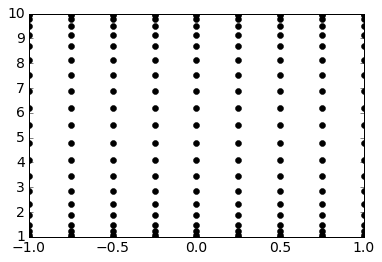

In [19]:
plt.plot(int4.nodes[0], int4.nodes[1], 'ko'); plt.show()

Let's define a two-dimensional function to integrate over this domain.

In [20]:
def f(x,y):
    # Integral of this function over x, y in [-1,1], [1,10]
    # equals 5.205052755795596 according to Mathematica
    return np.exp(-x**2-(y-4.)**2/2**2)

# Plot the function
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(nodes5, nodes6)
ax.plot_surface(X, Y, f(X, Y), alpha=0.3, rstride=1, cstride=1);

The integral of this function at these points is given approximately by:

In [21]:
int4.integral(f(*int4.nodes))

5.176849799459486

which agrees well with the exact result of $5.205052755795596$. The integral's accuracy can be improved with more quadrature nodes, which is done below.

In [22]:
# Build a finer quadrature rule
nodes8, weights8 = quad.trapezoidal([-1, 1], incr=0.01)
nodes9, weights9 = quad.chebyshev_lobatto([1, 10], num=101)

# Tensor product the nodes and weights
nodes10 = rp.grid(nodes8, nodes9)
weights10 = rp.grid(weights8, weights9)

# Define a new integration rule on this finer mesh
int5 = rp.Integration(nodes=nodes10, weights=np.array(map(np.prod, weights10.T)))

# Integrate the function
int5.integral(f(*int5.nodes))

5.2049517074125564